# Mesure de la dispersion du faisceau

## !!! ajouter le calcul d'incertitudes sur les modèles !!!
## !!! ajouter calcul coeff r² !!!

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from scipy.optimize import curve_fit

In [45]:
def R_square(tab_y,y_reg):
    y = np.average(tab_y)

    s1 = np.sum((tab_y - y_reg)**2)
    s2 = np.sum((tab_y - y)**2)

    R2 = 1 - s1/s2

    R2 = int(100*R2)/100

    return R2

In [46]:
def gauss(x, A, B): 
	y = A*np.exp(-2*x**2/(B**2))
	return y	

def div(x,A,B):
	y = A*np.sqrt(1+(x/B)**2)
	return y

In [47]:
def get_r_v(z):
    global cur
    cur.execute(f"SELECT data.Radius, data.Voltage FROM data WHERE data.distance = {z} ORDER BY data.Radius")
    rows = cur.fetchall()
    r = np.array([row[0] for row in rows])
    v = np.array([row[1] for row in rows])
    return np.array(r),np.array(v)

In [48]:
def get_r_v_2(z):
    global cur
    cur.execute(f"SELECT data.Radius, data.Voltage FROM data WHERE data.distance = {z} AND data.radius >= {0} ORDER BY data.Radius")
    rows = cur.fetchall()
    r = np.array([row[0] for row in rows])
    v = np.array([row[1] for row in rows])
    return np.array(r),np.array(v)

In [49]:
conn = sqlite3.connect("data2.db")
cur = conn.cursor()

In [50]:
z_list = cur.execute("SELECT DISTINCT data.distance FROM data ORDER BY data.distance").fetchall()
z_list = [z[0] for z in z_list]
z_list

[1.1, 3.93, 4.5, 5.2, 6.6, 7.0, 8.0]

2.07698506922702 3.0509396145105465
W(1.1) = 3.0509396145105465
Matrice de covariance
[[ 0.00585131 -0.00573041]
 [-0.00573041  0.02306187]]


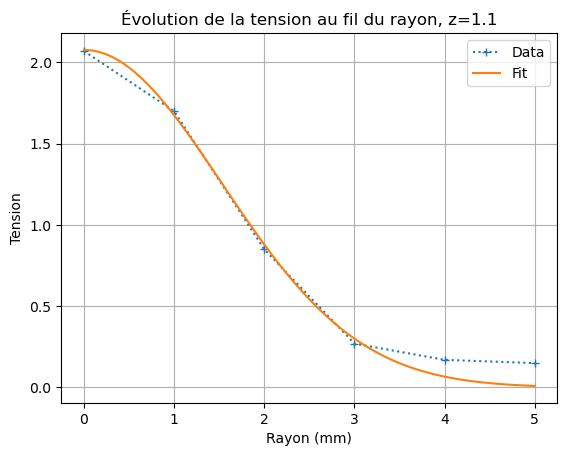

2.0906799956049062 3.753179592435842
W(3.93) = 3.753179592435842
Matrice de covariance
[[ 0.00566815 -0.00680218]
 [-0.00680218  0.03177914]]


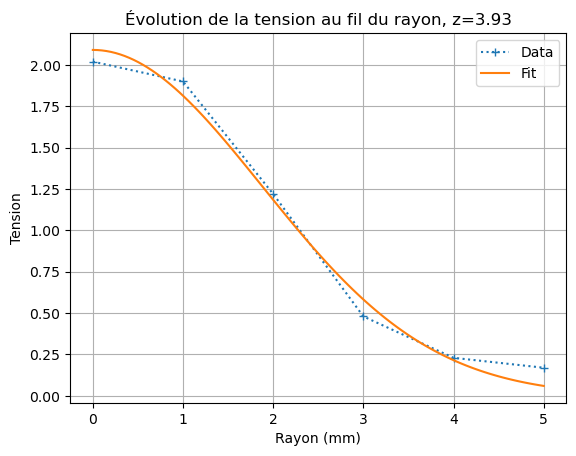

2.0930369691386526 3.8116743962135664
W(4.5) = 3.8116743962135664
Matrice de covariance
[[ 0.01008491 -0.01228627]
 [-0.01228627  0.05803062]]


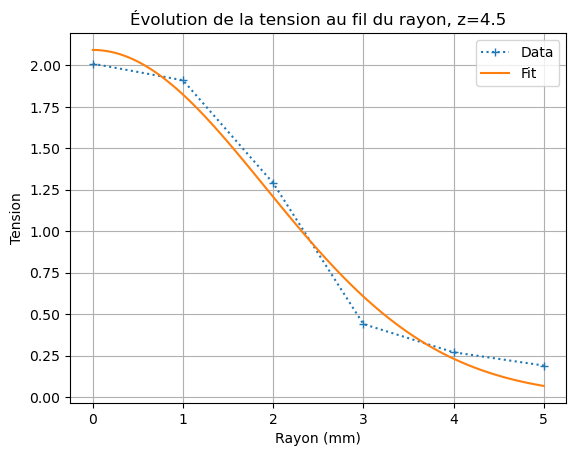

2.0327359651516215 3.8860870543583426
W(5.2) = 3.8860870543583426
Matrice de covariance
[[ 0.00470342 -0.00602204]
 [-0.00602204  0.02973504]]


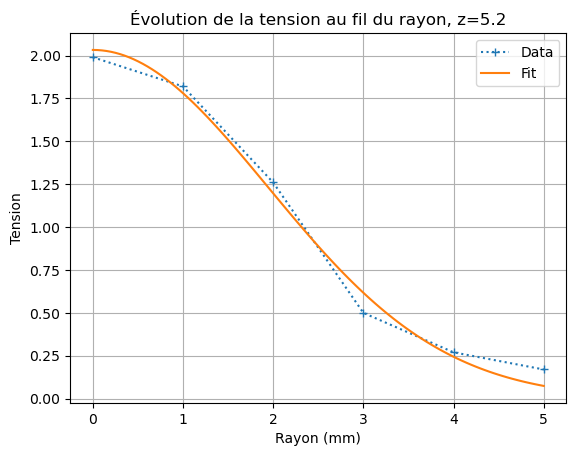

1.595621263329036 4.505977390213705
W(6.6) = 4.505977390213705
Matrice de covariance
[[ 0.0011113  -0.0021478 ]
 [-0.0021478   0.01526317]]


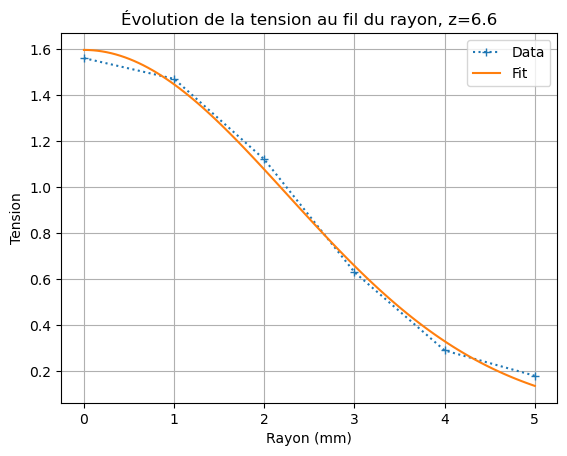

2.2099221098983954 4.63261072838917
W(7.0) = 4.63261072838917
Matrice de covariance
[[ 0.01428439 -0.02065358]
 [-0.02065358  0.10860579]]


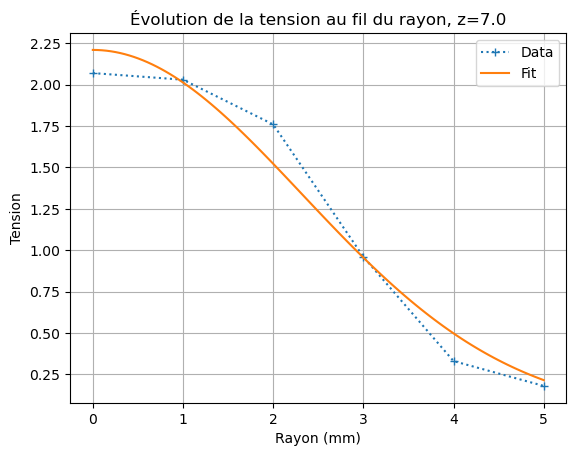

1.6633314560106212 4.785833832393539
W(8.0) = 4.785833832393539
Matrice de covariance
[[ 0.00281874 -0.00565625]
 [-0.00565625  0.04071011]]


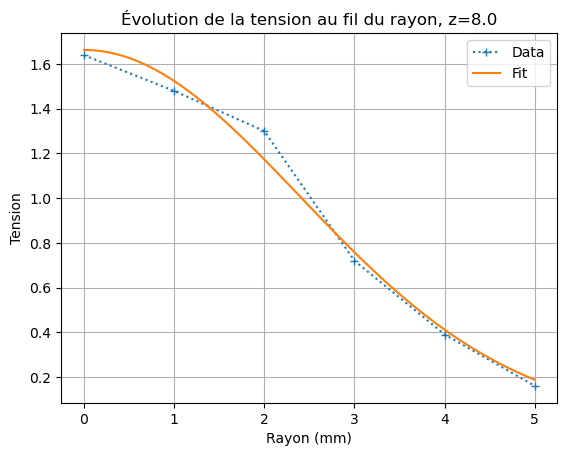

In [51]:
W_list = []

for z in z_list:
    R,V = get_r_v_2(z)
    parameters,covariance = curve_fit(gauss, R, V)
    fit_A = parameters[0]
    fit_B = parameters[1]

    print(fit_A, fit_B)
    print(f"W({z}) = {fit_B}")
    print("Matrice de covariance")
    print(covariance)

    W_list.append(fit_B)

    fit_r = np.linspace(min(R), max(R), 100)
    fit_v = gauss(fit_r, fit_A, fit_B)

    plt.plot(R,V, ":+", label="Data")
    plt.plot(fit_r, fit_v, "-", label="Fit") 
    plt.grid()
    plt.xlabel("Rayon (mm)")
    plt.ylabel("Tension")
    plt.title(f"Évolution de la tension au fil du rayon, z={z}")
    plt.legend()
    plt.show()

In [52]:
z_list,W_list = np.array(z_list),np.array(W_list)

In [53]:
parameters,covariance = curve_fit(div, z_list, W_list)
fit_A = parameters[0]
fit_B = parameters[1]

print("Matrice de covariance")
print(covariance)

print(f"W0 = {fit_A}, z0 = {fit_B}")

fit_z = np.linspace(min(z_list), max(z_list), 100)
fit_w = div(fit_z, fit_A, fit_B)

Matrice de covariance
[[0.00817598 0.03496671]
 [0.03496671 0.17193593]]
W0 = 3.1046458832982093, z0 = 6.509584945781654


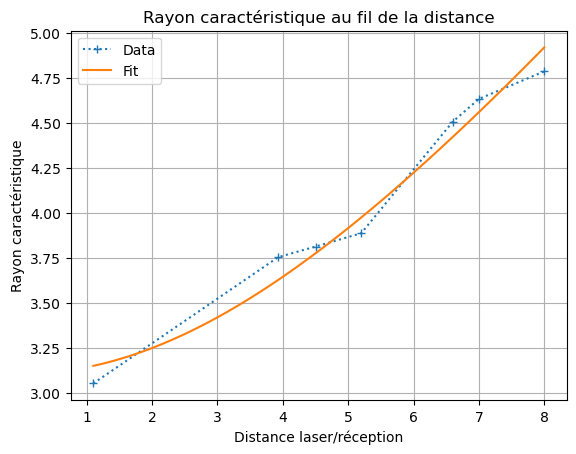

In [54]:
plt.plot(z_list, W_list, ":+", label="Data")
plt.plot(fit_z, fit_w, "-", label="Fit")
plt.xlabel("Distance laser/réception")
plt.ylabel("Rayon caractéristique")
plt.title("Rayon caractéristique au fil de la distance")
plt.legend()
plt.grid()

In [55]:
conn.close()